In [2]:
import utils.s3ops as s3ops

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
bucket_name = "strava-raw"
tables = [  
    "activities.json",
    "laps.json",
    "streams.json",
    "zones.json",
]

In [5]:
activities = s3ops.load_table(bucket_name, tables[0])

In [6]:
for key, activity in activities.items():
    if activity['name'] == "Philly Marathon!":
        print(key)

8146083540


In [7]:
streams = s3ops.load_table(bucket_name, tables[2])

In [9]:

latlon_data = {
    "xs": [],
    "ys": []
}
for key, obj in streams.items():
    if 'latlng' in obj:
        y, x = np.transpose(obj['latlng']['data'])
        if np.mean(x) > -75.4 and np.mean(x) < -75 and np.mean(y) > 39.6:
            latlon_data['xs'].append(x)
            latlon_data['ys'].append(y)

In [27]:
np.min(np.hstack(latlon_data['ys'])), np.max(np.hstack(latlon_data['ys']))

(39.933504, 40.026844)

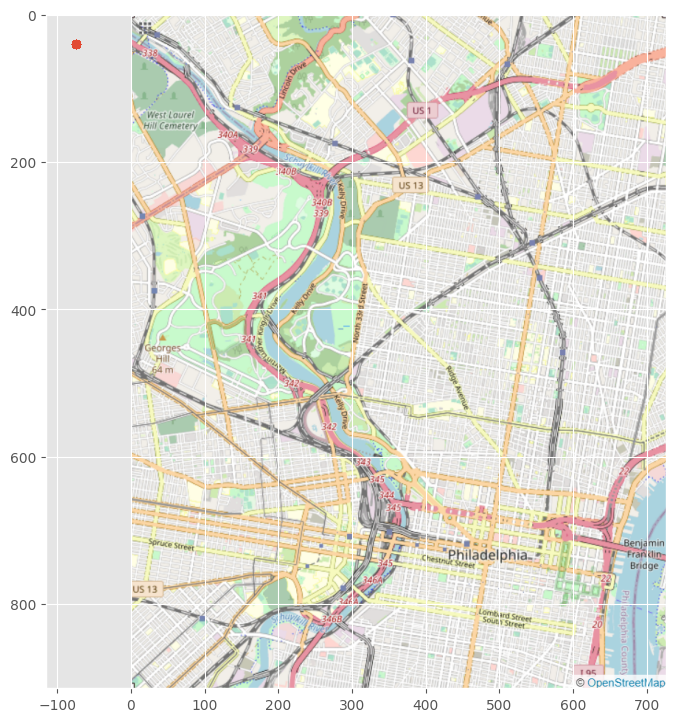

In [35]:
import matplotlib.image as mpimg
img = mpimg.imread('test.png')

plt.figure(figsize=(8, 16))
plt.imshow(img)
plt.show()

In [88]:
y_range, x_range, _ = img.shape

In [89]:
x_master = np.hstack(latlon_data['xs'])
y_master = np.hstack(latlon_data['ys'])

In [90]:
x_data = latlon_data['xs'][105]
x_data = ((x_data - np.min(x_master)) / (np.max(x_master) - np.min(x_master))) * x_range

y_data = latlon_data['ys'][105]
y_data = (1 - (y_data - np.min(y_master)) / (np.max(y_master) - np.min(y_master))) * y_range

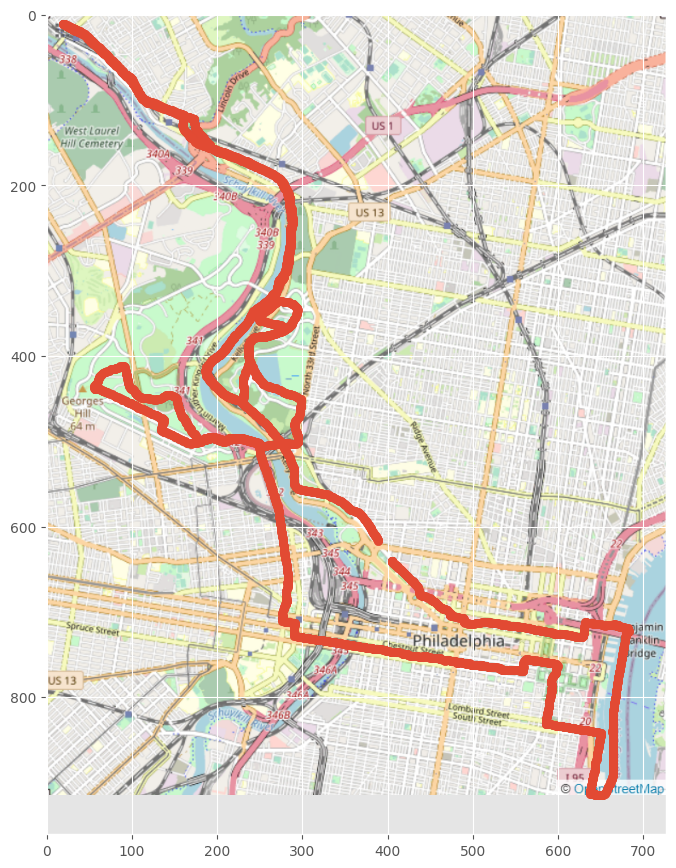

In [91]:
plt.figure(figsize=(8, 16))
plt.imshow(img)
plt.scatter(x_data, y_data)
plt.show()

In [59]:
x_data - np.min(x_data)

array([0.049204, 0.049204, 0.049204, ..., 0.047116, 0.047145, 0.047156])

In [61]:
0.049204 / (np.max(x_data) - np.min(x_data))

0.5818414019819166

In [65]:
x_data

array([0.5818414 , 0.5818414 , 0.5818414 , ..., 0.55715063, 0.55749356,
       0.55762363])